<h1 style="font-size: 80px; color: blue"> 
Olivia Finder - Implementation
</h1>


The notebook is prepared to show the operation of the Olivia Finder library from the point of view of the implementation of the source code.

A description of the sub-packages implemented is provided and a demonstration of their functionality

# **0 - Previous requirements**

## Setup venv and install requirements

In [1]:
# %pip install -r requirements.txt

If you use a virtual environment, it is necessary to configure it as selected in the Jupyter kernel


## Setup library path

Make sure to run this cell to have the **olivia-finder** library at PATH

In [1]:
# Append the path to the olivia_finder package
import sys
sys.path.append('../../olivia_finder/')

## Setup configuration

It is necessary to initialize the configuration, the most comfortable and global way to do so is through an environment variable

In [2]:
# Add the environment variable OLIVIA_FINDER_CONFIG_FILE_PATH
import os
os.environ['OLIVIA_FINDER_CONFIG_FILE_PATH'] = "../../olivia_finder/config.ini"

# **1 - `olivia_finder.utilities`**


The utility package is designed to contain source code that is used in the library on a recurring basis, and whose functionality is to provide a certain utility to the library.

## Module structure

**Package structure**

```bash
../../olivia_finder/olivia_finder/utilities
├── config.py
├── exception.py
├── __init__.py
├── logger.py
├── singleton_decorator.py
└── utilities.py
```


**Class diagrams**

In [3]:
!pyreverse -o mmd -d ../../olivia_finder/diagrams/ -p utilities ../../olivia_finder/olivia_finder/utilities

parsing ../../olivia_finder/olivia_finder/utilities/__init__.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/utilities/singleton_decorator.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/utilities/logger.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/utilities/utilities.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/utilities/__init__.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/utilities/config.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/utilities/exception.py...


```mermaid 
classDiagram
  class utilities {
  }
  class config {
  }
  class exception {
  }
  class logger {
  }
  class singleton_decorator {
  }
  class utilities {
  }
  config --> exception
  config --> singleton_decorator
  logger --> config
  logger --> exception
  logger --> utilities


```

```mermaid
classDiagram
  class ConfigFileNotFound {
  }
  class ConfigKeyNotFound {
  }
  class Configuration {
    get_key(section: str, key: str)
  }
  class ConsoleLogFormatter {
    format(record: logging.LogRecord) str
  }
  class FileLogFormatter {
    format(record: logging.LogRecord) str
  }
  
  class MyLogger {
    configure(config_key: str) logging.Logger
    configure_level(logger_name: str, handler_type: str, level: str) None
    enable_console(logger_name: str, console_level: str) None
    enable_file(logger_name: str, log_file: str, log_file_level: str) None
    get_logger(logger_name: Optional[str]) logging.Logger
  }
  class OliviaFinderException {
    message : str
  }
  class _SingletonWrapper {
  }
  ConfigFileNotFound --|> OliviaFinderException
  ConfigKeyNotFound --|> OliviaFinderException


```



## Module `utilities.config`


Provides the configuration class, which is used to obtain the configuration variables defined in the .ini configuration file

It is a Singleton instance so only one instance is accessible from any part of the code through the constructor


In [5]:
from olivia_finder.utilities.config import Configuration

You need to provide a configuration file

The configuration file is located in the root of the olivia_finder package

In [6]:
!cat ../../olivia_finder/olivia_finder/config.ini

[olivia_finder_logger]
; Levels: DEBUG, INFO, WARNING, ERROR, CRITICAL
name                     = olivia_finder
level                    = DEBUG
status                   = ENABLED
file_handler             = ENABLED
console_handler          = ENABLED

; Myrequests configuration
[logger_myrequests]
name                 = olivia_finder.myrequests
level                = DEBUG
status               = DISABLED
file_handler         = DISABLED
console_handler      = ENABLED

; Package Manager configuration
[logger_packagemanager]
name                 = olivia_finder.packagemanager
level                = DEBUG
status               = DISABLED
file_handler         = DISABLED
console_handler      = DISABLED

; CSV Datasource configuration
[logger_datasource]
name                 = olivia_finder.datasource
level                = DEBUG
status               = DISABLED
file_handler         = DISABLED
console_handler      = DISABLED

; Output directory for the results
[folders]
persistence_dir          

Load the config using constructor

In [7]:
Configuration(file_path='../../olivia_finder/olivia_finder/config.ini')

Acess the keys using `get_key` method

In [8]:
Configuration().get_key('olivia_finder_logger', 'status')

'ENABLED'

## Module `utilities.logger`


In [9]:
from olivia_finder.utilities.logger import MyLogger

The class MyLogger implements an utility loging tools to register the actions of execution. It is based on the default Python logging module

In [10]:
logger = MyLogger.configure('olivia_finder_logger')

logger.debug('Debug message')
logger.info('Info message')
logger.warning('Warning message')
logger.error('Error message')
logger.critical('Critical message')

# Acess the logger using the configured name
MyLogger.get_logger(logger.name).debug('Debug message')

# Acess the logger using the default logging class
import logging
logging.getLogger(logger.name).debug('Debug message')

2023-06-05 19:57:25,308 [olivia_finder(DEBUG)] -> 4423775.py:3
Debug message
2023-06-05 19:57:25,309 [olivia_finder(INFO)] -> 4423775.py:4
Info message
2023-06-05 19:57:25,310 [olivia_finder(WARNING)] -> 4423775.py:5
Warning message
2023-06-05 19:57:25,310 [olivia_finder(ERROR)] -> 4423775.py:6
Error message
2023-06-05 19:57:25,311 [olivia_finder(CRITICAL)] -> 4423775.py:7
Critical message
2023-06-05 19:57:25,311 [olivia_finder(DEBUG)] -> 4423775.py:10
Debug message
2023-06-05 19:57:25,311 [olivia_finder(DEBUG)] -> 4423775.py:14
Debug message


Default logger is root

In [11]:
# The default logger is root and it is not configured
MyLogger.get_logger().debug('Debug message')
MyLogger.get_logger().info('Info message')
MyLogger.get_logger().warning('Warning message')
MyLogger.get_logger().error('Error message')
MyLogger.get_logger().critical('Critical message')

Warning message
Error message
Critical message


Change log level

In [12]:
MyLogger.configure_level(logger.name, 'console', 'warning')
MyLogger.get_logger(logger.name).debug('Debug message')
MyLogger.get_logger(logger.name).info('Info message')
MyLogger.get_logger(logger.name).warning('Warning message')
MyLogger.get_logger(logger.name).error('Error message')
MyLogger.get_logger(logger.name).critical('Critical message')

2023-06-05 19:57:25,323 [olivia_finder(WARNING)] -> 446635553.py:4
Warning message
2023-06-05 19:57:25,324 [olivia_finder(ERROR)] -> 446635553.py:5
Error message
2023-06-05 19:57:25,324 [olivia_finder(CRITICAL)] -> 446635553.py:6
Critical message


## Module `utilities.exceptions`

Includes a series of exceptions to be used by the library and provide a more generic context in the case of being rised

In [13]:
from olivia_finder.utilities.exception import OliviaFinderException

In [14]:
OliviaFinderException('Test exception')

OliviaFinderException: Test exception

## Module `utilities.singleton_decorator`

This module includes a decorator-based implementation of the Singleton design pattern

In [15]:
from olivia_finder.utilities.singleton_decorator import singleton

In [16]:
# Dummy class
@singleton
class Dummy:
    def __init__(self, name):
        self.name = name

In [17]:
print(Dummy('test').name)
print(Dummy('test2').name)

test
test


## Module `utilities.utilities`

A module containing common source code to be reused

# **2 - `olivia_finder.myrequests`**


The myrequest package is prepared to concurrently make requests to a web server, being able to abuse these requests without denying us the service. 

The package includes different modules that are responsible for carrying out this task transparently, such as obtaining proxies and useragents to disguise the origin of the request, or the concurrent execution of requests.


## Module structure

**Package structure**

In [18]:
# Remove compiled files (pycache folders and .pyc files)
!find ../../olivia_finder/ -name "__pycache__" -exec rm -rf {} \;

# Show the directory structure
!tree ../../olivia_finder/olivia_finder/myrequests

find: ‘../../olivia_finder/olivia_finder/data_source/repository_scrapers/__pycache__’: No existe el archivo o el directorio
find: ‘../../olivia_finder/olivia_finder/data_source/__pycache__’: No existe el archivo o el directorio
find: ‘../../olivia_finder/olivia_finder/__pycache__’: No existe el archivo o el directorio
find: ‘../../olivia_finder/olivia_finder/utilities/__pycache__’: No existe el archivo o el directorio
find: ‘../../olivia_finder/olivia_finder/myrequests/__pycache__’: No existe el archivo o el directorio
find: ‘../../olivia_finder/olivia_finder/myrequests/proxy_builders/__pycache__’: No existe el archivo o el directorio
../../olivia_finder/olivia_finder/myrequests
├── data
│   └── useragents.txt
├── __init__.py
├── job.py
├── proxy_builders
│   ├── __init__.py
│   ├── list_builder.py
│   ├── proxy_builder.py
│   └── ssl_proxies.py
├── proxy_handler.py
├── request_handler.py
├── request_worker.py
└── useragent_handler.py

2 directories, 11 files


**Class diagrams**

In [4]:
!pyreverse -o mmd -d ../../olivia_finder/diagrams/ -p myrequests ../../olivia_finder/olivia_finder/myrequests

parsing ../../olivia_finder/olivia_finder/myrequests/__init__.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/myrequests/request_handler.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/myrequests/proxy_handler.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/myrequests/job.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/myrequests/request_worker.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/myrequests/__init__.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/myrequests/useragent_handler.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/myrequests/proxy_builders/__init__.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/myrequests/proxy_

```mermaid
classDiagram
  class myrequests {
  }
  class job {
  }
  class proxy_builders {
  }
  class list_builder {
  }
  class proxy_builder {
  }
  class ssl_proxies {
  }
  class proxy_handler {
  }
  class request_handler {
  }
  class request_worker {
  }
  class useragent_handler {
  }
  list_builder --> proxy_builder
  ssl_proxies --> proxy_builder
  proxy_handler --> list_builder
  proxy_handler --> proxy_builder
  proxy_handler --> ssl_proxies
  request_handler --> job
  request_handler --> request_worker
  request_worker --> job
  request_worker --> proxy_handler
  request_worker --> useragent_handler

```

```mermaid
classDiagram
  class ListProxyBuilder {
    TIMEOUT : int
  }
  class ProxyBuilder {
    logger : RootLogger, NoneType, Logger
    request_timeout : Optional[int]
    url : Optional[str]
    get_proxies() List[str]
  }
  class ProxyHandler {
    PROXY_MAX_USES : int
    lock : lock
    logger : RootLogger, Logger, NoneType
    proxy_builders : List[ProxyBuilder], list
    proxy_list : List[str], list
    proxy_max_uses : int
    proxy_uses : dict
    get_next_proxy() Union[str, None]
  }
  class RequestHandler {
    PARALLEL_WORKERS : int
    jobs_queue : Queue
    logger : RootLogger, Logger, NoneType
    num_workers : int
    workers : List[RequestWorker]
    do_request(job: RequestJob)
    do_requests(request_jobs: List[RequestJob], num_workers: int, progress_bar: Optional[tqdm.tqdm]) List[RequestJob]
  }
  class RequestJob {
    FINALIZE_KEY : str
    key : object
    params : Optional[Dict[str, str]]
    response : Response, Optional[requests.Response]
    url : Optional[str]
    end_job_signal() RequestJob
    set_response(job_response: requests.Response)
  }
  class RequestWorker {
    RETRIES : int
    RETRY_DELAY : int
    TIMEOUT : int
    jobs_queue : Queue
    logger : RootLogger, Logger, NoneType
    my_jobs : list
    progress_bar : Optional[tqdm.tqdm]
    proxy_handler
    stopped : bool
    user_agent_handler
    worker_id : int
    run()
  }
  class SSLProxiesBuilder {
  }
  class UserAgentHandler {
    DATA_FILE
    DATA_FILE : str
    USERAGENTSTRING_URL : str
    lock : lock
    logger : Logger, NoneType, RootLogger
    useragents_list : List[str]
    useragents_list : list
    get_next_useragent() str
  }
  ListProxyBuilder --|> ProxyBuilder
  SSLProxiesBuilder --|> ProxyBuilder
  ProxyHandler --* RequestWorker : proxy_handler
  UserAgentHandler --* RequestWorker : user_agent_handler

```

## Subpackage `myrequests.proxy_builders`


The proxy builder subpackage takes care of getting a list of proxies. 

Two implementations are available, one based on an online proxy provider called SSL proxies, and the other based on a proxy list. The proxy list-based implementation is proposed as the best option due to its genericity.

We can focus on two different ways:

- Obtain the data through Web Scraping from some website that provides updated proxys, like SSLProxies

- Obtain the data from a proxies list in format `<IP>:<PORT>` from a web server

This is shown below


**_Web scraping implementation (from sslproxies.org)_**


In [20]:
from olivia_finder.myrequests.proxy_builders.ssl_proxies import SSLProxiesBuilder

In [21]:
MyLogger.get_logger("olivia_finder.myrequests").handlers[0].propagate = False

In [22]:
pb_SSLProxies = SSLProxiesBuilder()
pb_SSLProxies.get_proxies()

['23.122.184.9:8888',
 '203.109.19.137:12241',
 '134.19.254.2:21231',
 '103.156.248.102:8080',
 '115.144.102.132:10041',
 '124.198.11.101:12425',
 '34.145.217.128:8080',
 '186.121.235.220:8080',
 '209.38.201.164:45212',
 '178.33.3.163:8080',
 '103.180.125.61:3128',
 '119.8.10.18:7890',
 '115.144.99.220:11116',
 '190.61.88.147:8080',
 '209.38.254.44:45212',
 '134.122.26.11:80',
 '213.171.44.134:3128',
 '20.241.236.196:3128',
 '51.159.115.233:3128',
 '64.225.8.179:9998',
 '202.40.177.69:80',
 '64.225.4.29:9865',
 '197.201.96.123:80',
 '40.119.236.22:80',
 '213.136.101.40:3128',
 '144.217.253.209:9300',
 '154.236.177.117:1981',
 '81.12.44.197:3129',
 '82.210.8.173:80',
 '61.28.233.217:3128',
 '109.194.101.128:3128',
 '185.15.172.212:3128',
 '64.225.8.121:9985',
 '185.97.115.181:3128',
 '94.183.190.129:6660',
 '154.236.179.227:1976',
 '45.169.98.73:8080',
 '213.241.205.2:8080',
 '20.219.112.20:80',
 '8.219.97.248:80',
 '49.51.189.190:80',
 '64.225.8.191:9992',
 '172.105.128.71:56444',
 '18

**_Web list implementation (from lists)_**


In [23]:
from olivia_finder.myrequests.proxy_builders.list_builder import ListProxyBuilder

In [24]:
pb_ListBuilder = ListProxyBuilder(
    url="https://raw.githubusercontent.com/mertguvencli/http-proxy-list/main/proxy-list/data.txt")
pb_ListBuilder.get_proxies()

['20.241.236.196:3128',
 '34.145.217.128:8080',
 '157.245.222.183:80',
 '119.8.10.18:7890',
 '34.145.217.128:8080',
 '20.241.236.196:3128',
 '213.171.44.134:3128',
 '40.119.236.22:80',
 '135.181.85.92:8080',
 '176.95.54.202:83',
 '61.28.233.217:3128',
 '209.222.98.213:48747',
 '51.159.115.233:3128',
 '115.96.208.124:8080',
 '8.219.97.248:80',
 '186.121.235.220:8080',
 '197.201.96.123:80',
 '41.186.44.106:3128',
 '209.38.201.164:45212',
 '202.162.195.54:8089',
 '157.245.85.36:8080',
 '5.78.99.203:8080',
 '5.161.107.243:8080',
 '46.182.6.51:3129',
 '5.78.107.114:8080',
 '5.161.189.248:8080',
 '5.161.101.225:8080',
 '159.223.175.57:8080',
 '5.78.75.179:8080',
 '5.161.192.56:8080',
 '65.109.236.232:8080',
 '65.109.239.174:8080',
 '5.161.94.107:8080',
 '65.21.190.172:8080',
 '107.152.33.41:8080',
 '178.128.88.72:10000',
 '5.161.112.209:8080',
 '49.12.187.177:8080',
 '5.78.104.120:8080',
 '114.116.249.11:3128',
 '5.78.78.63:8080',
 '49.12.102.255:8080',
 '5.78.67.184:8080',
 '65.21.190.172:8

## Module `myrequests.proxy_handler`

In [25]:
from olivia_finder.myrequests.proxy_handler import ProxyHandler

In [26]:
ph = ProxyHandler()

In [27]:
for i in range(10):
    print(ph.get_next_proxy())

http://95.217.208.133:8080
http://193.176.242.186:80
http://102.39.193.213:8080
http://178.128.172.154:3128
http://176.194.189.40:80
http://90.154.124.211:8080
http://191.97.6.213:999
http://112.78.170.251:5678
http://190.217.101.73:999
http://110.232.86.22:5678


## Module `myrequests.useragent_handler`

In [28]:
from olivia_finder.myrequests.useragent_handler import UserAgentHandler

The purpose of this class is to provide a set of useragents to be used by the RequestHandler object with the aim of hiding the original identity of the web request

The class is prepared to load the useragents from a text file contained in the package, and in turn can obtain them from a website dedicated to provide them.

If both options are not available, there will be used the default ones hardcoded in the class


Useragents dataset included on the package MyRequests


In [5]:
!tail ../../olivia_finder/olivia_finder/myrequests/data/useragents.txt

Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.91 Safari/537.36
Mozilla/5.0 (iPad; U; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.130 Safari/537.36
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) coc_coc_browser/50.0.125 Chrome/44.0.2403.125 Safari/537.36
Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0; SLCC2; .NET CLR 2.0.50727; .NET4.0C; .NET4.0E)
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.124 Safari/537.36
Mozilla/5.0 (Windows NT 6.3; Win64; x64; Trident/7.0; MAARJS; rv:11.0) like Gecko
Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-N900T Build/LRX21V) AppleWebKit/537.36 (KHTML, li

The default constructor loads the usragents from the file


In [30]:
ua_handler = UserAgentHandler()
ua_handler.useragents_list[:5]

['Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/37.0.2062.94 Chrome/37.0.2062.94 Safari/537.36',
 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.85 Safari/537.36',
 'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko',
 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.0',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/600.8.9 (KHTML, like Gecko) Version/8.0.8 Safari/600.8.9']

We can force obtaining the useragents from the Internet with the flag:

```python
use_file=False
```

We can force get useragents from internet <span style="color:red">(As the class is a Singleton instance I can't show it in the notebook)</span>

```python
ua_handler = UserAgentHandler(use_file=False)
ua_handler.useragents_list[:5]

```


Once the class is initialized, it can provide a random useragent to the object RequestHandler to perform the request


In [31]:
useragents = [ua_handler.get_next_useragent() for _ in range(10)]
useragents

['Mozilla/5.0 (Windows NT 5.1; rv:41.0) Gecko/20100101 Firefox/41.0',
 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.85 Safari/537.36',
 'Mozilla/5.0 (X11; U; Linux x86_64; en-US) AppleWebKit/537.36 (KHTML, like Gecko)  Chrome/30.0.1599.114 Safari/537.36 Puffin/4.5.0IT',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.76.4 (KHTML, like Gecko) Version/7.0.4 Safari/537.76.4',
 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36',
 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36',
 'Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X) AppleWebKit/537.51.2 (KHTML, like Gecko) CriOS/45.0.2454.68 Mobile/11D257 Safari/9537.53',
 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.94 Safari/537.36',
 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.20

## Module `myrequests.request_handler`

In [32]:
from olivia_finder.myrequests.job import RequestJob
from olivia_finder.myrequests.request_handler import RequestHandler

It is the main class of the MyRequest package and makes use of the ProxyHandler and UserAgentHandler classes to obtain the proxies and user agents that will be used in the web requests that is responsible for performing.


The default constructor does not receive parameters, the class will manage to instantize their units and use the default configuration


**Make a request**


In [33]:


job = RequestJob(
    key="networkx",
    url="https://www.pypi.org/project/networkx/"
)

In [34]:
rh = RequestHandler()
finalized_job = rh.do_request(job)

As a result we obtain the ResponseJob object but with the data of the response


In [35]:
print(
    f'Key: {finalized_job.key}\n'
    f'URL: {finalized_job.url}\n'
    f'Response: {finalized_job.response}\n'
)

Key: networkx
URL: https://www.pypi.org/project/networkx/
Response: <Response [200]>



**Do parallel requests**


We can make parallel requests through the use of Threads, it is safe to do so since the class is prepared for it


In [36]:
# Initialize RequestHandler
from tqdm import tqdm
rh = RequestHandler()

# Initialize RequestJobs
request_jobs = [
    RequestJob(key="networkx", url="https://www.pypi.org/project/networkx/"),
    RequestJob(key="pandas", url="https://www.pypi.org/project/pandas/"),
    RequestJob(key="numpy", url="https://www.pypi.org/project/numpy/"),
    RequestJob(key="matplotlib",
               url="https://www.pypi.org/project/matplotlib/"),
    RequestJob(key="scipy", url="https://www.pypi.org/project/scipy/"),
    RequestJob(key="scikit-learn",
               url="https://www.pypi.org/project/scikit-learn/"),
    RequestJob(key="tensorflow",
               url="https://www.pypi.org/project/tensorflow/"),
    RequestJob(key="keras", url="https://www.pypi.org/project/keras/")
]

# Set number of workers
num_workers = 4

# Initialize progress bar
progress_bar = tqdm(total=len(request_jobs))

finalized_jobs = rh.do_requests(
    request_jobs=request_jobs,
    num_workers=num_workers,
    progress_bar=progress_bar
)

100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

As a result we get a list of ResponseJob objects


In [37]:
for job in finalized_jobs:
    print(f'Key: {job.key}, URL: {job.url}, Response: {job.response}')

Key: networkx, URL: https://www.pypi.org/project/networkx/, Response: <Response [200]>
Key: scikit-learn, URL: https://www.pypi.org/project/scikit-learn/, Response: <Response [200]>
Key: pandas, URL: https://www.pypi.org/project/pandas/, Response: <Response [200]>
Key: scipy, URL: https://www.pypi.org/project/scipy/, Response: <Response [200]>
Key: numpy, URL: https://www.pypi.org/project/numpy/, Response: <Response [200]>
Key: tensorflow, URL: https://www.pypi.org/project/tensorflow/, Response: <Response [200]>
Key: matplotlib, URL: https://www.pypi.org/project/matplotlib/, Response: <Response [200]>
Key: keras, URL: https://www.pypi.org/project/keras/, Response: <Response [200]>


The Job object contains the response to request


In [38]:
print(finalized_jobs[0].response.text[10000:20000])

 class="split-layout split-layout--middle package-description">
    
      <p class="package-description__summary">Python package for creating and manipulating graphs and networks</p>
    
    <div data-html-include="/_includes/edit-project-button/networkx">
    </div>
    </div>
  </div>
</div>

<div data-controller="project-tabs">
  <div class="tabs-container">
    <div class="vertical-tabs">
      <div class="vertical-tabs__tabs">
        <div class="sidebar-section">
          <h3 class="sidebar-section__title">Navigation</h3>
          <nav aria-label="Navigation for networkx">
            <ul class="vertical-tabs__list" role="tablist">
              <li role="tab">
                <a id="description-tab" href="#description" data-project-tabs-target="tab" data-action="project-tabs#onTabClick" class="vertical-tabs__tab vertical-tabs__tab--with-icon vertical-tabs__tab--is-active" aria-selected="true" aria-label="Project description. Focus will be moved to the description.">
        

# **3 - `olivia_finder.data_source`**


## Description


This package is responsible for providing a base data structure for all the derivated classes whose purpose is the obtaining data from a specific source.

It is composed of several modules:

##### Package structure:

```data_source
├── csv_ds.py
├── data_source.py
├── librariesio_ds.py
├── repository_scrapers
│   ├── bioconductor.py
│   ├── cran.py
│   ├── npm.py
│   ├── pypi.py
│   └── r.py
└── scraper_ds.py
```

##### Package modules:

- **data_source.py**

  Implements the abstract class Datasource, which is the base class of the rest of the implementations

- **csv_ds.py**

  Implement datasource for \*.csv files

- **librariesio_ds.py**

  Implements datasource for the API of Libraries.io

- **scraper_ds.py**

  Implements the abstract class ScraperDataSource, which is the base class of customized implementations for each repository

- **repository_scraper/**

  Inside there are several implementations based on Datasource web Scraping for Cran, Bioconductor, NPM and PyPI

##### Doc pages

For more info see [data_source package docs](https://dab0012.github.io/olivia-finder/olivia_finder/data_source/data_source_module.html)


In [39]:
!pyreverse -o mmd -d  -p data_source ../lib/olivia_finder/data_source

```mermaid
classDiagram
  class data_source {
  }
  class csv_ds {
  }
  class data_source {
  }
  class librariesio_ds {
  }
  class repository_scrapers {
  }
  class bioconductor {
  }
  class cran {
  }
  class npm {
  }
  class pypi {
  }
  class r {
  }
  class scraper_ds {
  }
  csv_ds --> data_source
  librariesio_ds --> data_source
  scraper_ds --> data_source

```


```mermaid
classDiagram
  class BioconductorScraper {
    BIOCONDUCTOR_LIST_URL : str
    BIOCONDUCTOR_PACKAGE_DATA_URL : str
    DESCRIPTION : str
    NAME : str
    obtain_package_names() list[str]
  }
  class CSVDataSource {
    data : DataFrame, TextFileReader, NoneType
    dependency_field : str
    dependency_version_field : str
    dependent_field : str
    dependent_url_field : str
    dependent_version_field : str
    file_path : str
    obtain_package_data(package_name: str, override_previous: bool) dict
    obtain_package_names() list[str]
    obtain_packages_data(package_names: list[str], progress_bar: tqdm.tqdm) tuple[list[dict], list[str]]
  }
  class CranScraper {
    CRAN_PACKAGE_DATA_URL : str
    CRAN_PACKAGE_LIST_URL : str
    DESCRIPTION : str
    NAME : str
    obtain_package_names() list[str]
  }
  class DataSource {
    description : str
    name : str
    get_info() dict
    obtain_package_data(package_name: str)* dict
    obtain_package_names()* list[str]
    obtain_packages_data(package_names: list[str])* list[dict]
  }
  class LibrariesIoException {
  }
  class LibrariesioDataSource {
    platform : str
    search : Search
    obtain_package_data(package_name: str) Union[dict, None]
    obtain_package_names()* list[str]
    obtain_packages_data(package_names: list[str]) list[dict]
  }
  class NotFoundInDataSourceException {
    data_source_name : str
    package_name : str
  }
  class NpmScraper {
    DESCRIPTION : str
    NAME : str
    NPM_PACKAGE_LIST_URL : str
    NPM_PACKAGE_REGISTRY_URL : str
    NPM_REPO_URL : str
    chunks_folder : NoneType
    obtain_package_names(page_size: int, show_progress_bar: bool, save_chunks: bool) list[dict]
  }
  class PypiScraper {
    DESCRIPTION : str
    NAME : str
    PYPI_PACKAGE_DATA_URL : str
    PYPI_PACKAGE_LIST_URL : str
    obtain_package_names() list[str]
  }
  class ScraperDataSource {
    not_found : list
    request_handler : NoneType, RequestHandler
    obtain_package_data(package_name: str) Union[dict, None]
    obtain_package_names()* list[str]
    obtain_packages_data(package_names: list[str], progress_bar: tqdm.tqdm) Tuple[list[dict], list[str]]
  }
  class ScraperError {
  }
  CSVDataSource --|> DataSource
  LibrariesioDataSource --|> DataSource
  BioconductorScraper --|> ScraperDataSource
  CranScraper --|> ScraperDataSource
  NpmScraper --|> ScraperDataSource
  PypiScraper --|> ScraperDataSource
  ScraperDataSource --|> DataSource

```


## Web Scraping-Based implementations


### Constructor


- The default constructor does not receive parameters

- The number of optional parameters depends on the implementation, but as a rule we can define a name and a description (With the purpose of offering information)

- The most relevant parameter is the RequestHandler object, which will use by the webscraping based DataSource to make requests to the website to which it refers


Implementation for CRAN


In [40]:
from olivia_finder.data_source.repository_scrapers.cran import CranScraper
cran_ds = CranScraper()

Implementation for Bioconductor


In [12]:
from olivia_finder.data_source.repository_scrapers.bioconductor import BioconductorScraper
bioconductor_scraper = BioconductorScraper()

Implementation for PyPi


In [16]:
from olivia_finder.data_source.repository_scrapers.pypi import PypiScraper
pypi_scraper = PypiScraper()

Implementation for NPM


In [43]:
from olivia_finder.data_source.repository_scrapers.npm import NpmScraper
npm_scraper = NpmScraper()

Github repository implementation

In [44]:
from olivia_finder.data_source.repository_scrapers.github import GithubScraper
github_scraper = GithubScraper()

### Obtain package names


CRAN package names


In [45]:
cran_ds.obtain_package_names()[:10]

['A3',
 'AalenJohansen',
 'AATtools',
 'ABACUS',
 'abbreviate',
 'abbyyR',
 'abc',
 'abc.data',
 'ABC.RAP',
 'ABCanalysis']

Bioconductor package names


In [46]:
bioconductor_scraper.obtain_package_names()[:10]

['ABSSeq',
 'ABarray',
 'ACE',
 'ACME',
 'ADAM',
 'ADAMgui',
 'ADImpute',
 'ADaCGH2',
 'AGDEX',
 'AHMassBank']

PyPi package names


In [47]:
pypi_scraper.obtain_package_names()[:10]

['0',
 '0-._.-._.-._.-._.-._.-._.-0',
 '000',
 '0.0.1',
 '00101s',
 '00print_lol',
 '00SMALINUX',
 '0101',
 '01changer',
 '01d61084-d29e-11e9-96d1-7c5cf84ffe8e']

NPM package names

<span style="color: red">Note:</span>

- This process is very expensive, the implementation is functional but its use is not recommended unless it is necessary
- It is recommended to import the list of npm packets properctioned as a txt file

Output folder can be configured in `config.ini` file `working_dir`


In [48]:
# npm_scraper.obtain_package_names(
#     page_size=100,                          # Number of packages to obtain per request
#     save_chunks=True,                       # Save packages in a chunk file
#     show_progress_bar=True                  # Show progress bar
# )[:10]

The file with the NPM package list is the following


In [49]:
!wc -l results/package_lists/npm_packages.txt

wc: results/package_lists/npm_packages.txt: No existe el archivo o el directorio


In [50]:
!tail -n 20 results/package_lists/npm_packages.txt

tail: no se puede abrir 'results/package_lists/npm_packages.txt' para lectura: No existe el archivo o el directorio


### Obtain package data


CRAN data of A3 package


In [51]:
cran_ds.obtain_package_data('A3')

{'name': 'A3',
 'version': '1.0.0',
 'dependencies': [{'name': 'R', 'version': '≥ 2.15.0'},
  {'name': 'xtable', 'version': ''},
  {'name': 'pbapply', 'version': ''}],
 'url': 'https://cran.r-project.org/package=A3'}

If the petition fails we will obtain None


In [52]:
non_existent_package = cran_ds.obtain_package_data('NON_EXISTENT_PACKAGE')
print(non_existent_package)

None


Bioconductor data of a4 package


In [53]:
bioconductor_scraper.obtain_package_data('a4')

{'name': 'a4',
 'version': '1.48.0',
 'dependencies': [{'name': 'a4Base', 'version': ''},
  {'name': 'a4Preproc', 'version': ''},
  {'name': 'a4Classif', 'version': ''},
  {'name': 'a4Core', 'version': ''},
  {'name': 'a4Reporting', 'version': ''}],
 'url': 'https://www.bioconductor.org/packages/release/bioc/html/a4.html'}

PyPi data od networkx package


In [54]:
pypi_scraper.obtain_package_data('networkx')

{'name': 'networkx',
 'version': '3.1',
 'url': 'https://pypi.org/project/networkx/',
 'dependencies': [{'name': 'numpy', 'version': None},
  {'name': 'scipy', 'version': None},
  {'name': 'matplotlib', 'version': None},
  {'name': 'pandas', 'version': None},
  {'name': 'pre', 'version': None},
  {'name': 'mypy', 'version': None},
  {'name': 'sphinx', 'version': None},
  {'name': 'pydata', 'version': None},
  {'name': 'numpydoc', 'version': None},
  {'name': 'pillow', 'version': None},
  {'name': 'nb2plots', 'version': None},
  {'name': 'texext', 'version': None},
  {'name': 'lxml', 'version': None},
  {'name': 'pygraphviz', 'version': None},
  {'name': 'pydot', 'version': None},
  {'name': 'sympy', 'version': None},
  {'name': 'pytest', 'version': None},
  {'name': 'codecov', 'version': None}]}

NPM data of aws-sdk package


In [55]:
npm_scraper.obtain_package_data('aws-sdk')

{'name': 'aws-sdk',
 'version': '2.1390.0',
 'dependencies': [{'name': 'buffer', 'version': '4.9.2'},
  {'name': 'events', 'version': '1.1.1'},
  {'name': 'ieee754', 'version': '1.1.13'},
  {'name': 'jmespath', 'version': '0.16.0'},
  {'name': 'querystring', 'version': '0.2.0'},
  {'name': 'sax', 'version': '1.2.1'},
  {'name': 'url', 'version': '0.10.3'},
  {'name': 'util', 'version': '^0.12.4'},
  {'name': 'uuid', 'version': '8.0.0'},
  {'name': 'xml2js', 'version': '0.5.0'}],
 'url': 'https://www.npmjs.com/package/aws-sdk'}

### Obtain a list of packages data


CRAN data for the packages A3, AER y a non existent package


In [56]:
cran_ds.obtain_packages_data(['A3', 'AER', "NON_EXISTING_PACKAGE"])

([{'name': 'A3',
   'version': '1.0.0',
   'dependencies': [{'name': 'R', 'version': '≥ 2.15.0'},
    {'name': 'xtable', 'version': ''},
    {'name': 'pbapply', 'version': ''}],
   'url': 'https://cran.r-project.org/package=A3'},
  {'name': 'AER',
   'version': '1.2-10',
   'dependencies': [{'name': 'R', 'version': '≥ 3.0.0'},
    {'name': 'car', 'version': '≥ 2.0-19'},
    {'name': 'lmtest', 'version': ''},
    {'name': 'sandwich', 'version': '≥ 2.4-0'},
    {'name': 'survival', 'version': '≥ 2.37-5'},
    {'name': 'zoo', 'version': ''},
    {'name': 'stats', 'version': ''},
    {'name': 'Formula', 'version': '≥ 0.2-0'}],
   'url': 'https://cran.r-project.org/package=AER'}],
 ['NON_EXISTING_PACKAGE'])

Bioconductor data for the packages TDARACNE, ASICS and a non existent package


In [57]:
from tqdm import tqdm

bioconductor_scraper.obtain_packages_data(
    package_names=['a4', 'a4Preproc', 'a4Classif', 'a4Core', 'a4Base'],
    progress_bar=tqdm(total=5)
)

([{'name': 'a4',
   'version': '1.48.0',
   'dependencies': [{'name': 'a4Base', 'version': ''},
    {'name': 'a4Preproc', 'version': ''},
    {'name': 'a4Classif', 'version': ''},
    {'name': 'a4Core', 'version': ''},
    {'name': 'a4Reporting', 'version': ''}],
   'url': 'https://www.bioconductor.org/packages/release/bioc/html/a4.html'},
  {'name': 'a4Preproc',
   'version': '1.48.0',
   'dependencies': [{'name': 'BiocGenerics', 'version': ''},
    {'name': 'Biobase', 'version': ''}],
   'url': 'https://www.bioconductor.org/packages/release/bioc/html/a4Preproc.html'},
  {'name': 'a4Classif',
   'version': '1.48.0',
   'dependencies': [{'name': 'a4Core', 'version': ''},
    {'name': 'a4Preproc', 'version': ''},
    {'name': 'methods', 'version': ''},
    {'name': 'Biobase', 'version': ''},
    {'name': 'ROCR', 'version': ''},
    {'name': 'pamr', 'version': ''},
    {'name': 'glmnet', 'version': ''},
    {'name': 'varSelRF', 'version': ''},
    {'name': 'utils', 'version': ''},
    {'

In [58]:
pypi_scraper.obtain_packages_data(
    ['networkx', 'requests', "tqdm", "NON_EXISTING_PACKAGE"])

([{'name': 'networkx',
   'version': '3.1',
   'url': 'https://pypi.org/project/networkx/',
   'dependencies': [{'name': 'numpy', 'version': None},
    {'name': 'scipy', 'version': None},
    {'name': 'matplotlib', 'version': None},
    {'name': 'pandas', 'version': None},
    {'name': 'pre', 'version': None},
    {'name': 'mypy', 'version': None},
    {'name': 'sphinx', 'version': None},
    {'name': 'pydata', 'version': None},
    {'name': 'numpydoc', 'version': None},
    {'name': 'pillow', 'version': None},
    {'name': 'nb2plots', 'version': None},
    {'name': 'texext', 'version': None},
    {'name': 'lxml', 'version': None},
    {'name': 'pygraphviz', 'version': None},
    {'name': 'pydot', 'version': None},
    {'name': 'sympy', 'version': None},
    {'name': 'pytest', 'version': None},
    {'name': 'codecov', 'version': None}]},
  {'name': 'requests',
   'version': '2.31.0',
   'url': 'https://pypi.org/project/requests/',
   'dependencies': [{'name': 'charset', 'version': None

In [59]:
npm_scraper.obtain_packages_data(
    ['aws-sdk', 'request', "NON_EXISTING_PACKAGE"])

([{'name': 'aws-sdk',
   'version': '2.1390.0',
   'dependencies': [{'name': 'buffer', 'version': '4.9.2'},
    {'name': 'events', 'version': '1.1.1'},
    {'name': 'ieee754', 'version': '1.1.13'},
    {'name': 'jmespath', 'version': '0.16.0'},
    {'name': 'querystring', 'version': '0.2.0'},
    {'name': 'sax', 'version': '1.2.1'},
    {'name': 'url', 'version': '0.10.3'},
    {'name': 'util', 'version': '^0.12.4'},
    {'name': 'uuid', 'version': '8.0.0'},
    {'name': 'xml2js', 'version': '0.5.0'}],
   'url': 'https://www.npmjs.com/package/aws-sdk'},
  {'name': 'request',
   'version': '2.88.2',
   'dependencies': [{'name': 'aws-sign2', 'version': '~0.7.0'},
    {'name': 'aws4', 'version': '^1.8.0'},
    {'name': 'caseless', 'version': '~0.12.0'},
    {'name': 'combined-stream', 'version': '~1.0.6'},
    {'name': 'extend', 'version': '~3.0.2'},
    {'name': 'forever-agent', 'version': '~0.6.1'},
    {'name': 'form-data', 'version': '~2.3.2'},
    {'name': 'har-validator', 'version':

## CSV-Based implementation


### Constructor


In [61]:
from olivia_finder.data_source.csv_ds import CSVDataSource
bioconductor_csv = CSVDataSource(
    "resources/bioconductor_adjlist_scraping.csv",   # Path to the CSV file
    # Name of the field that contains the dependencies
    dependent_field="name",
    # Name of the field that contains the name of the package
    dependency_field="dependency",
    # Name of the field that contains the version of the package
    dependent_version_field="version",
    # Name of the field that contains the version of the dependency
    dependency_version_field="dependency_version",
    # Name of the field that contains the URL of the package
    dependent_url_field="url",
)

### Obtain package data


In [62]:
bioconductor_csv.obtain_package_data('a4')

{'name': 'a4',
 'version': '1.48.0',
 'url': 'https://www.bioconductor.org/packages/release/bioc/html/a4.html',
 'dependencies': [{'name': 'a4Base', 'version': '1.48.0'},
  {'name': 'a4Preproc', 'version': '1.48.0'},
  {'name': 'a4Classif', 'version': '1.48.0'},
  {'name': 'a4Core', 'version': '1.48.0'},
  {'name': 'a4Reporting', 'version': '1.48.0'}]}

### Obtain a list of packages data


In [63]:
bioconductor_csv.obtain_packages_data(
    ['TDARACNE', 'ASICS', "NON_EXISTING_PACKAGE"])

([{'name': 'ASICS',
   'version': '2.16.0',
   'url': 'https://www.bioconductor.org/packages/release/bioc/html/ASICS.html',
   'dependencies': [{'name': 'R', 'version': nan},
    {'name': 'BiocParallel', 'version': '1.34.0'},
    {'name': 'ggplot2', 'version': nan},
    {'name': 'glmnet', 'version': nan},
    {'name': 'grDevices', 'version': nan},
    {'name': 'gridExtra', 'version': nan},
    {'name': 'methods', 'version': nan},
    {'name': 'mvtnorm', 'version': nan},
    {'name': 'PepsNMR', 'version': '1.18.0'},
    {'name': 'plyr', 'version': nan},
    {'name': 'quadprog', 'version': nan},
    {'name': 'ropls', 'version': '1.32.0'},
    {'name': 'stats', 'version': nan},
    {'name': 'SummarizedExperiment', 'version': '1.30.0'},
    {'name': 'utils', 'version': nan},
    {'name': 'Matrix', 'version': nan},
    {'name': 'zoo', 'version': nan}]}],
 ['TDARACNE', 'NON_EXISTING_PACKAGE'])

## Web API-Based implementation (Libraries.io API)


Based on the Web API of Libraries.io we can obtain data from this source.

It is important to note that the data is not updated as a mandatory point to care about


### Constructor


In this case, it is necessary to define the API Key of Libraries.io in the _config.ini_ file


In [64]:
from olivia_finder.data_source.librariesio_ds import LibrariesioDataSource

pypi_libio = LibrariesioDataSource(
    platform="pypi",
)

nuget_libio = LibrariesioDataSource(
    platform="nuget",
)

cran_libio = LibrariesioDataSource(
    platform="cran"
)

### Obtain package names


<p style="color:red">
This functionality has not been implemented because there is no way to get this data through the API
</p>


The library used to access API from Python has a search functionality but unfortunately it cannot be used efficiently for this task


In [65]:
# Set the apikey as an environment variable
from pybraries.search import Search

search = Search()
info = search.project_search(platform='pypi')

for project in info:
    print(project['name'])

A string of keywords must be passed as a keyword argument
typescript
@types/node
eslint
webpack
prettier
@types/jest
@types/react
@babel/runtime
@babel/preset-typescript
jest
rxjs
postcss
vue-template-compiler
vue
axios
requests
moment
@types/chai
@types/react-dom
@types/mocha
babel-preset-react
@babel/plugin-transform-runtime
@babel/preset-react
@babel/core
babel-runtime
@babel/preset-env
@babel/plugin-proposal-class-properties
babel-core
babel-jest
commander


### Obtain package data


In [66]:
pypi_libio.obtain_package_data('networkx')

{'name': 'networkx',
 'version': '3.1rc0',
 'dependencies': [{'name': 'codecov', 'version': '2.1.13'},
  {'name': 'pytest-cov', 'version': '4.0.0'},
  {'name': 'pytest', 'version': '7.3.1'},
  {'name': 'sympy', 'version': '1.11.1'},
  {'name': 'pydot', 'version': '0.9.10'},
  {'name': 'pygraphviz', 'version': '1.3.1'},
  {'name': 'lxml', 'version': '4.9.2'},
  {'name': 'texext', 'version': '0.6.7'},
  {'name': 'nb2plots', 'version': '0.6.1'},
  {'name': 'pillow', 'version': '9.5.0'},
  {'name': 'numpydoc', 'version': '1.5.0'},
  {'name': 'sphinx-gallery', 'version': '0.13.0'},
  {'name': 'pydata-sphinx-theme', 'version': '0.13.3'},
  {'name': 'sphinx', 'version': '7.0.1'},
  {'name': 'mypy', 'version': '1.3.0'},
  {'name': 'pre-commit', 'version': '3.3.2'},
  {'name': 'pandas', 'version': '2.0.1'},
  {'name': 'matplotlib', 'version': '3.7.1'},
  {'name': 'scipy', 'version': '1.10.1'},
  {'name': 'numpy', 'version': '1.24.3'}],
 'url': 'https://pypi.org/project/networkx/'}

In [67]:
nuget_libio.obtain_package_data('Microsoft.Extensions.DependencyInjection')

{'name': 'Microsoft.Extensions.DependencyInjection',
 'version': '8.0.0-preview.4.23259.5',
 'dependencies': [{'name': 'System.Threading.Tasks.Extensions',
   'version': '4.5.4'},
  {'name': 'Microsoft.Extensions.DependencyInjection.Abstractions',
   'version': '3.1.32'},
  {'name': 'Microsoft.Bcl.AsyncInterfaces', 'version': '7.0.0'}],
 'url': 'https://www.nuget.org/packages/Microsoft.Extensions.DependencyInjection/'}

### Obtain a list of packages data


In [68]:
cran_libio.obtain_packages_data(['A3', 'AER', "NON_EXISTING_PACKAGE"])

[{'name': 'A3',
  'version': '1.0.0',
  'dependencies': [{'name': 'R', 'version': None},
   {'name': 'randomForest', 'version': None}],
  'url': 'https://cran.r-project.org/package=A3'},
 {'name': 'AER',
  'version': '1.2-9',
  'dependencies': [{'name': 'vars', 'version': '0.5.3'},
   {'name': 'urca', 'version': None},
   {'name': 'tseries', 'version': None},
   {'name': 'truncreg', 'version': None},
   {'name': 'systemfit', 'version': None},
   {'name': 'strucchange', 'version': None},
   {'name': 'scatterplot3d', 'version': '0.3.4'},
   {'name': 'sampleSelection', 'version': None},
   {'name': 'rugarch', 'version': None},
   {'name': 'ROCR', 'version': None},
   {'name': 'rgl', 'version': '0.109.2'},
   {'name': 'quantreg', 'version': '5.42.1'},
   {'name': 'pscl', 'version': '1.5.5'},
   {'name': 'plm', 'version': None},
   {'name': 'np', 'version': None},
   {'name': 'nnet', 'version': None},
   {'name': 'nlme', 'version': None},
   {'name': 'mlogit', 'version': None},
   {'name': 

# **4 - Module `olivia_finder.package`**


Define the data structure of a package


In [69]:
from olivia_finder.package import Package


package = Package(
        "AER", "3.1.1", "https://cran.r-project.org/web/packages/AER/index.html", 
        [
                Package("car", "3.0-10", "https://cran.r-project.org/web/packages/car/index.html", []),
                Package("effects", "4.2-0","https://cran.r-project.org/web/packages/effects/index.html", []),
                Package("foreign", "0.8-80", "https://cran.r-project.org/web/packages/foreign/index.html", []),
        ]
)

package.print()

Package:
  name: AER
  version: 3.1.1
  url: https://cran.r-project.org/web/packages/AER/index.html
  dependencies:
    car:3.0-10
    effects:4.2-0
    foreign:0.8-80


In [70]:
package.to_dict()

{'name': 'AER',
 'version': '3.1.1',
 'url': 'https://cran.r-project.org/web/packages/AER/index.html',
 'dependencies': [{'name': 'car',
   'version': '3.0-10',
   'url': 'https://cran.r-project.org/web/packages/car/index.html',
   'dependencies': []},
  {'name': 'effects',
   'version': '4.2-0',
   'url': 'https://cran.r-project.org/web/packages/effects/index.html',
   'dependencies': []},
  {'name': 'foreign',
   'version': '0.8-80',
   'url': 'https://cran.r-project.org/web/packages/foreign/index.html',
   'dependencies': []}]}

In [87]:
package.load(
    {
        "name": "AER",
        "version": "3.1.1",
        "url": "https://cran.r-project.org/web/packages/AER/index.html",
        "dependencies": [
            {
                "name": "car",
                "version": "3.0-10",
                "url": "https://cran.r-project.org/web/packages/car/index.html",
                "dependencies": []
            },
            {
                "name": "effects",
                "version": "4.2-0",
                "url": "https://cran.r-project.org/web/packages/effects/index.html",
                "dependencies": []
            },
            {
                "name": "foreign",
                "version": "0.8-80",
                "url": "https://cran.r-project.org/web/packages/foreign/index.html",
                "dependencies": []
            }
        ]
    }

)

# **5 - Module `olivia_finder.package_manager`**

## Initialize a package manager


**Note:**

Initialization based on a scraper-type datasource involves initializing the data prior to its use.

Initialization based on a CSV-type datasource already contains all the data and can be retrieved directly.

Loading from a persistence file implies that the file contains an object that has already been initialized or already contains data.

A bioconductor scraping based package manager

In [10]:
from olivia_finder.package_manager import PackageManager

In [13]:
bioconductor_pm_scraper = PackageManager(
    data_sources=[                  # List of data sources
        BioconductorScraper(),
    ]
)

A cran package manager loaded from a csv file

In [74]:
cran_pm_csv = PackageManager(
    data_sources=[                  # List of data sources
        CSVDataSource(
            # Path to the CSV file
            "results/csv_datasets/cran/cran_adjlist_librariesio.csv",
            dependent_field="Project Name",
            dependency_field="Dependency Name",
            dependent_version_field="Version Number",
        )
    ]
)

A pypi package manager loaded from persistence file

In [77]:
bioconductor_pm_loaded = PackageManager.load_from_persistence("resources/bioconductor_scraper.olvpm")

A Maven package manager loaded from librariesio api

In [78]:
maven_pm_libio = PackageManager(
    data_sources=[                  # List of data sources
        LibrariesioDataSource(platform="maven")
    ]
)

**For scraping-based datasources: Initialize the structure with the data of the selected sources**


<span style="color:red">Note:</span>

The automatic obtaining of bioconductor packages as mentioned above depends on Selenium, which requires a pre-installed browser in the system, in our case Firefox.

It is possible that if you are running this notebook from a third-party Jupyter server, do not have a browser available

As a solution to this problem it is proposed to use the package_names parameter, in this way we can add a list of packages and the process can be continued

In [ ]:
# bioconductor_pm_scraper.initialize(show_progress=True)

Loading packages: 100%|██████████| 2230/2230 [05:50<00:00,  6.37it/s]


Initialization of the bioconductor package manager using package list

In [14]:
# Initialize the package list
bioconductor_package_list = []
with open('../results/package_lists/bioconductor_scraped.txt', 'r') as file:
    bioconductor_package_list = file.read().splitlines()

# Initialize the package manager with the package list
bioconductor_pm_scraper.initialize(show_progress=True, package_names=bioconductor_package_list[:10])

Loading packages:   0%|          | 0/10 [00:00<?, ?packages/s]

Loading packages: 100%|██████████| 10/10 [00:26<00:00,  2.62s/packages]


Initialization of the Pypi package manager


In [18]:
pypi_pm_scraper = PackageManager(
    data_sources=[                  # List of data sources
        PypiScraper(),
    ]
)

pypi_package_list = []
with open('../results/package_lists/pypi_scraped.txt', 'r') as file:
    pypi_package_list = file.read().splitlines()

# Initialize the package manager
pypi_pm_scraper.initialize(show_progress=True, package_names=pypi_package_list[:10])

# Save the package manager
pypi_pm_scraper.save(path="../results/package_managers/pypi_pm_scraper_test.olvpm")

Loading packages: 100%|██████████| 10/10 [00:00<00:00, 10.65packages/s]


Initialization of the npm package manager

In [ ]:
# Initialize the package manager
npm_package_list = []
with open('results/package_lists/npm_packages.txt', 'r') as file:
    npm_package_list = file.read().splitlines()

npm_pm_scraper = PackageManager(
    data_sources=[                  # List of data sources
        NpmScraper(),
    ]
)

# Initialize the package manager
npm_pm_scraper.initialize(show_progress=True, package_names=npm_package_list)

# Save the package manager
npm_pm_scraper.save_package_manager(path="results/package_managers/npm_pm_scraper.olvpm")

And using a csv based package manager

In [ ]:
cran_pm_csv.initialize(show_progress=True)

Loading packages:  64%|██████▍   | 9995/15522 [02:44<01:31, 60.48packages/s]2023-05-04 21:33:29,272 [INFO] in package_manager.obtain_packages (package_manager.py:258)
Total packages found: 10000
2023-05-04 21:33:29,273 [INFO] in package_manager.obtain_packages (package_manager.py:264)
Extending data source with obtained packages
Loading packages: 100%|██████████| 15522/15522 [04:15<00:00, 56.70packages/s]2023-05-04 21:35:00,473 [INFO] in package_manager.obtain_packages (package_manager.py:258)
Total packages found: 5522
2023-05-04 21:35:00,474 [INFO] in package_manager.obtain_packages (package_manager.py:264)
Extending data source with obtained packages
Loading packages: 100%|██████████| 15522/15522 [04:15<00:00, 60.71packages/s]


## Persistence


**Save the package manager**


In [ ]:
# bioconductor_pm_scraper.save_package_manager("results/package_managers/bioconductor_scraper.olvpm")

In [ ]:
# cran_pm_scraper.save_package_manager("results/package_managers/cran_scraper.olvpm")

In [ ]:
# pypi_pm_scraper.save_package_manager("results/package_managers/pypi_scraper.olvpm")

**Load package manager from persistence file**


In [ ]:
bioconductor_pm_loaded = PackageManager.load_package_manager(
    "results/package_managers/bioconductor_scraper.olvpm")

In [ ]:
cran_pm_loaded = PackageManager.load_package_manager(
    "results/package_managers/cran_scraper.olvpm")

In [ ]:
pypi_pm_loaded = PackageManager.load_package_manager(
    "results/package_managers/pypi_scraper.olvpm")

In [ ]:
npm_pm_loaded = PackageManager.load_package_manager(
    "results/package_managers/npm_scraper.olvpm")

## Package manager functionalities


**List package names**


In [ ]:
bioconductor_pm_loaded.list_package_names()[300:320]

['CNVgears',
 'CONSTANd',
 'CTSV',
 'CellNOptR',
 'ChAMP',
 'ChIPseqR',
 'CiteFuse',
 'Clonality',
 'CopyNumberPlots',
 'CytoGLMM',
 'DEFormats',
 'DEScan2',
 'DEsingle',
 'DMRcaller',
 'DOSE',
 'DSS',
 'DelayedMatrixStats',
 'DirichletMultinomial',
 'EBImage',
 'EDASeq']

In [ ]:
pypi_pm_loaded.list_package_names()[300:320]

['adafruit-circuitpython-bh1750',
 'adafruit-circuitpython-ble-beacon',
 'adafruit-circuitpython-ble-eddystone',
 'adafruit-circuitpython-bluefruitspi',
 'adafruit-circuitpython-bno08x',
 'adafruit-circuitpython-circuitplayground',
 'adafruit-circuitpython-debug-i2c',
 'adafruit-circuitpython-displayio-ssd1306',
 'adafruit-circuitpython-ds18x20',
 'adafruit-circuitpython-ens160',
 'adafruit-circuitpython-fingerprint',
 'adafruit-circuitpython-gc-iot-core',
 'adafruit-circuitpython-hcsr04',
 'adafruit-circuitpython-htu31d',
 'adafruit-circuitpython-imageload',
 'adafruit-circuitpython-itertools',
 'adafruit-circuitpython-lis2mdl',
 'adafruit-circuitpython-lps2x',
 'adafruit-circuitpython-lsm9ds0',
 'adafruit-circuitpython-max31855']

<span style="color: red"> Obtaining package names from libraries io api is not suported</span>

In [ ]:
maven_pm_libio.list_package_names()

[]

**Get the data as a dict usung datasource**

In [ ]:
maven_pm_libio.obtain_package("org.apache.commons:commons-lang3").to_dict()

{'name': 'org.apache.commons:commons-lang3',
 'version': '3.9',
 'url': 'https://repo1.maven.org/maven2/org/apache/commons/commons-lang3',
 'dependencies': [{'name': 'org.openjdk.jmh:jmh-generator-annprocess',
   'version': '1.25.2',
   'url': None,
   'dependencies': []},
  {'name': 'org.openjdk.jmh:jmh-core',
   'version': '1.25.2',
   'url': None,
   'dependencies': []},
  {'name': 'org.easymock:easymock',
   'version': '5.1.0',
   'url': None,
   'dependencies': []},
  {'name': 'org.hamcrest:hamcrest',
   'version': None,
   'url': None,
   'dependencies': []},
  {'name': 'org.junit-pioneer:junit-pioneer',
   'version': '2.0.1',
   'url': None,
   'dependencies': []},
  {'name': 'org.junit.jupiter:junit-jupiter',
   'version': '5.9.3',
   'url': None,
   'dependencies': []}]}

In [ ]:
cran_pm_csv.obtain_package('A3').to_dict()

{'name': 'A3',
 'version': '1.0.0',
 'url': None,
 'dependencies': [{'name': 'R',
   'version': None,
   'url': None,
   'dependencies': []},
  {'name': 'randomForest', 'version': None, 'url': None, 'dependencies': []}]}

**Get a package from self data**

In [ ]:
cran_pm_loaded.get_package('A3')

In [ ]:
npm_pm_loaded.get_package("react").to_dict()

{'name': 'react',
 'version': '18.2.0',
 'url': 'https://www.npmjs.com/package/react',
 'dependencies': [{'name': 'loose-envify',
   'version': '^1.1.0',
   'url': None,
   'dependencies': []}]}

**List package objects**


In [ ]:
len(npm_pm_loaded.list_package_names())

1919072

In [ ]:
pypi_pm_loaded.list_packages()[300:320]

**Obtain dependency networks**

Using the data previously obtained and that are already loaded in the structure

In [ ]:
a4_network = bioconductor_pm_loaded.dependency_network("a4")
a4_network

{'a4': ['a4Base', 'a4Preproc', 'a4Classif', 'a4Core', 'a4Reporting'],
 'a4Base': ['a4Preproc',
  'a4Core',
  'methods',
  'graphics',
  'grid',
  'Biobase',
  'annaffy',
  'mpm',
  'genefilter',
  'limma',
  'multtest',
  'glmnet',
  'gplots'],
 'a4Preproc': ['BiocGenerics', 'Biobase'],
 'BiocGenerics': ['R', 'methods', 'utils', 'graphics', 'stats'],
 'Biobase': ['R', 'BiocGenerics', 'utils', 'methods'],
 'a4Core': ['Biobase', 'glmnet', 'methods', 'stats'],
 'annaffy': ['R',
  'methods',
  'Biobase',
  'BiocManager',
  'GO.db',
  'AnnotationDbi',
  'DBI'],
 'AnnotationDbi': ['R',
  'methods',
  'utils',
  'stats4',
  'BiocGenerics',
  'Biobase',
  'IRanges',
  'DBI',
  'RSQLite',
  'S4Vectors',
  'stats',
  'KEGGREST'],
 'IRanges': ['R',
  'methods',
  'utils',
  'stats',
  'BiocGenerics',
  'S4Vectors',
  'stats4'],
 'S4Vectors': ['R', 'methods', 'utils', 'stats', 'stats4', 'BiocGenerics'],
 'KEGGREST': ['R', 'methods', 'httr', 'png', 'Biostrings'],
 'genefilter': ['MatrixGenerics',
 

In [ ]:
commons_lang3_network = maven_pm_libio.dependency_network(
    "org.apache.commons:commons-lang3", generate=True)
commons_lang3_network

{'org.apache.commons:commons-lang3': ['org.openjdk.jmh:jmh-generator-annprocess',
  'org.openjdk.jmh:jmh-core',
  'org.easymock:easymock',
  'org.hamcrest:hamcrest',
  'org.junit-pioneer:junit-pioneer',
  'org.junit.jupiter:junit-jupiter'],
 'org.openjdk.jmh:jmh-generator-annprocess': ['org.openjdk.jmh:jmh-core'],
 'org.openjdk.jmh:jmh-core': ['junit:junit',
  'net.sf.jopt-simple:jopt-simple',
  'org.apache.commons:commons-math3'],
 'junit:junit': ['org.hamcrest:hamcrest-core'],
 'org.hamcrest:hamcrest-core': ['org.hamcrest:hamcrest'],
 'net.sf.jopt-simple:jopt-simple': ['org.hamcrest:hamcrest-all',
  'org.apache.ant:ant',
  'org.infinitest:continuous-testing-toolkit',
  'joda-time:joda-time',
  'junit:junit'],
 'org.apache.ant:ant': ['junit:junit', 'org.apache.ant:ant-launcher'],
 'org.infinitest:continuous-testing-toolkit': ['junit:junit',
  'org.hamcrest:hamcrest-all',
  'commons-io:commons-io',
  'commons-lang:commons-lang',
  'com.google.collections:google-collections'],
 'joda-ti

**Obtaining updated data**

In [ ]:
a4_network2 = bioconductor_pm_loaded.dependency_network("a4", generate=True)
a4_network2

{'a4': ['a4Base', 'a4Preproc', 'a4Classif', 'a4Core', 'a4Reporting'],
 'a4Base': ['a4Preproc',
  'a4Core',
  'methods',
  'graphics',
  'grid',
  'Biobase',
  'annaffy',
  'mpm',
  'genefilter',
  'limma',
  'multtest',
  'glmnet',
  'gplots'],
 'a4Preproc': ['BiocGenerics', 'Biobase'],
 'BiocGenerics': ['R', 'methods', 'utils', 'graphics', 'stats'],
 'Biobase': ['R', 'BiocGenerics', 'utils', 'methods'],
 'a4Core': ['Biobase', 'glmnet', 'methods', 'stats'],
 'annaffy': ['R',
  'methods',
  'Biobase',
  'BiocManager',
  'GO.db',
  'AnnotationDbi',
  'DBI'],
 'AnnotationDbi': ['R',
  'methods',
  'utils',
  'stats4',
  'BiocGenerics',
  'Biobase',
  'IRanges',
  'DBI',
  'RSQLite',
  'S4Vectors',
  'stats',
  'KEGGREST'],
 'IRanges': ['R',
  'methods',
  'utils',
  'stats',
  'BiocGenerics',
  'S4Vectors',
  'stats4'],
 'S4Vectors': ['R', 'methods', 'utils', 'stats', 'stats4', 'BiocGenerics'],
 'KEGGREST': ['R', 'methods', 'httr', 'png', 'Biostrings'],
 'genefilter': ['MatrixGenerics',
 

Note that some package managers use dependencies that are not found is their repositories, as is the case of the 'xable' package, which although it is not in bioconductor, is dependence on a bioconductor package

In [ ]:
xtable_bioconductor = bioconductor_pm_scraper.get_package("xtable")
xtable_bioconductor

In concrete this package is in Cran

In [ ]:
cran_pm = PackageManager(
    "CRAN scraper",         # Name of the package manager
    data_sources=[                  # List of data sources
        CranScraper(),
    ]
)

cran_pm.obtain_package("xtable")

To solve this incongruity, we can supply the packet manager the Datasource de Cran, such as auxiliary datasource in which to perform searches if data is not found in the main datasource

In [ ]:
MyLogger.enable_console("myrequests", "debug")

In [ ]:
bioconductor_cran_pm = PackageManager(
    # Name of the package manager
    "Bioconductor with auxyliary CRAN datasource",
    data_sources=[                                          # List of data sources
        BioconductorScraper(),
        CranScraper(),
    ]
)

bioconductor_cran_pm.obtain_package("xtable")

2023-05-18 23:57:18,332 [myrequests(INFO)] -> request_handler.py:20
Creating RequestHandler object
2023-05-18 23:57:18,333 [myrequests(INFO)] -> request_handler.py:20
Creating RequestHandler object
2023-05-18 23:57:18,333 [myrequests(DEBUG)] -> request_handler.py:85
Job created
2023-05-18 23:57:18,334 [myrequests(DEBUG)] -> request_handler.py:164
Starting worker 0
2023-05-18 23:57:18,334 [myrequests(INFO)] -> request_handler.py:166
Starting request for xtable: https://www.bioconductor.org/packages/release/bioc/html/xtable.html
2023-05-18 23:57:18,335 [myrequests(DEBUG)] -> request_worker.py:85
Worker 0: Got job from queue
Job key: xtable
url: https://www.bioconductor.org/packages/release/bioc/html/xtable.html
2023-05-18 23:57:18,335 [myrequests(DEBUG)] -> request_worker.py:93
Worker 0: Obtaining proxy and user agent
2023-05-18 23:57:18,336 [myrequests(DEBUG)] -> proxy_handler.py:99
Getting next proxy
2023-05-18 23:57:18,336 [myrequests(DEBUG)] -> useragent_handler.py:194
Next useragent

In this way we can obtain the network of dependencies for a package recursively, now having access to packages and dependencies that are from CRAN repository

In [ ]:
a4_network3 = bioconductor_cran_pm.dependency_network("a4", generate=True)
a4_network3

{'a4': ['a4Base', 'a4Preproc', 'a4Classif', 'a4Core', 'a4Reporting'],
 'a4Base': ['a4Preproc',
  'a4Core',
  'methods',
  'graphics',
  'grid',
  'Biobase',
  'annaffy',
  'mpm',
  'genefilter',
  'limma',
  'multtest',
  'glmnet',
  'gplots'],
 'a4Preproc': ['BiocGenerics', 'Biobase'],
 'BiocGenerics': ['R', 'methods', 'utils', 'graphics', 'stats'],
 'Biobase': ['R', 'BiocGenerics', 'utils', 'methods'],
 'a4Core': ['Biobase', 'glmnet', 'methods', 'stats'],
 'glmnet': ['R',
  'Matrix',
  'methods',
  'utils',
  'foreach',
  'shape',
  'survival',
  'Rcpp'],
 'Matrix': ['R', 'methods', 'graphics', 'grid', 'lattice', 'stats', 'utils'],
 'foreach': ['R', 'codetools', 'utils', 'iterators'],
 'shape': ['R', 'stats', 'graphics', 'grDevices'],
 'survival': ['R',
  'graphics',
  'Matrix',
  'methods',
  'splines',
  'stats',
  'utils'],
 'Rcpp': ['methods', 'utils'],
 'annaffy': ['R',
  'methods',
  'Biobase',
  'BiocManager',
  'GO.db',
  'AnnotationDbi',
  'DBI'],
 'BiocManager': ['utils'],


As you can see, we can get a more complete network when we combine datasources

It is necessary that there be compatibility as in the case of Bioconductor/CRAN

In [ ]:
a4_network.keys() == a4_network2.keys()

True

In [ ]:
print(len(a4_network.keys()))
print(len(a4_network2.keys()))
print(len(a4_network3.keys()))

18
18
42


## Export the data

In [ ]:
bioconductor_df = bioconductor_pm_loaded.export_adjlist(full_data=True)
bioconductor_df.to_csv(
    "results/csv_datasets/bioconductor/bioconductor_adjlist_scraping.csv", index=False)
bioconductor_df

,name,version,url,dependency,dependency_version,dependency_url
0,ABSSeq,1.54.0,https://www.bioconductor.org/packages/release/...,R,None,None
1,ABSSeq,1.54.0,https://www.bioconductor.org/packages/release/...,methods,None,None
2,ABSSeq,1.54.0,https://www.bioconductor.org/packages/release/...,locfit,None,None
3,ABSSeq,1.54.0,https://www.bioconductor.org/packages/release/...,limma,3.56.0,https://www.bioconductor.org/packages/release/...
4,AMOUNTAIN,1.26.0,https://www.bioconductor.org/packages/release/...,R,None,None
...,...,...,...,...,...,...
28322,zenith,1.2.0,https://www.bioconductor.org/packages/release/...,reshape2,None,None
28323,zenith,1.2.0,https://www.bioconductor.org/packages/release/...,progress,None,None
28324,zenith,1.2.0,https://www.bioconductor.org/packages/release/...,utils,None,None
28325,zenith,1.2.0,https://www.bioconductor.org/packages/release/...,Rdpack,None,None


In [ ]:
pypi_df = pypi_pm_loaded.export_adjlist(full_data=True)
pypi_df.to_csv(
    "results/csv_datasets/pypi/pypi_adjlist_scraping.csv", index=False)
pypi_df

,name,version,url,dependency,dependency_version,dependency_url
0,0x-sra-client,4.0.0,https://pypi.org/project/0x-sra-client/,urllib3,2.0.2,https://pypi.org/project/urllib3/
1,0x-sra-client,4.0.0,https://pypi.org/project/0x-sra-client/,six,1.16.0,https://pypi.org/project/six/
2,0x-sra-client,4.0.0,https://pypi.org/project/0x-sra-client/,certifi,2022.12.7,https://pypi.org/project/certifi/
3,0x-sra-client,4.0.0,https://pypi.org/project/0x-sra-client/,python,None,None
4,0x-sra-client,4.0.0,https://pypi.org/project/0x-sra-client/,0x,0.1,https://pypi.org/project/0x/
...,...,...,...,...,...,...
933950,zyfra-check,0.0.9,https://pypi.org/project/zyfra-check/,pytest,7.3.1,https://pypi.org/project/pytest/
933951,zyfra-check,0.0.9,https://pypi.org/project/zyfra-check/,jira,3.5.0,https://pypi.org/project/jira/
933952,zyfra-check,0.0.9,https://pypi.org/project/zyfra-check/,testit,None,None
933953,zython,0.4.1,https://pypi.org/project/zython/,wheel,0.40.0,https://pypi.org/project/wheel/


In [ ]:
npm_df = npm_pm_loaded.export_adjlist(full_data=True)
npm_df.to_csv("results/csv_datasets/npm/npm_adjlist_scraping.csv", index=False)
npm_df

,name,version,url,dependency,dependency_version,dependency_url
0,--hoodmane-test-pyodide,0.21.0,https://www.npmjs.com/package/--hoodmane-test-...,base-64,1.0.0,https://www.npmjs.com/package/base-64
1,--hoodmane-test-pyodide,0.21.0,https://www.npmjs.com/package/--hoodmane-test-...,node-fetch,3.3.1,https://www.npmjs.com/package/node-fetch
2,--hoodmane-test-pyodide,0.21.0,https://www.npmjs.com/package/--hoodmane-test-...,ws,8.13.0,https://www.npmjs.com/package/ws
3,-lidonghui,1.0.0,https://www.npmjs.com/package/-lidonghui,axios,1.4.0,https://www.npmjs.com/package/axios
4,-lidonghui,1.0.0,https://www.npmjs.com/package/-lidonghui,commander,10.0.1,https://www.npmjs.com/package/commander
...,...,...,...,...,...,...
4855089,zzzzz-first-module,1.0.0,https://www.npmjs.com/package/zzzzz-first-module,rxjs,7.8.1,https://www.npmjs.com/package/rxjs
4855090,zzzzz-first-module,1.0.0,https://www.npmjs.com/package/zzzzz-first-module,zone.js,0.13.0,https://www.npmjs.com/package/zone.js
4855091,zzzzzwszzzz,1.0.0,https://www.npmjs.com/package/zzzzzwszzzz,commander,10.0.1,https://www.npmjs.com/package/commander
4855092,zzzzzwszzzz,1.0.0,https://www.npmjs.com/package/zzzzzwszzzz,inquirer,9.2.2,https://www.npmjs.com/package/inquirer


## Explore the data


### Stats

**Difference between the data obtained and the expected data**

In [ ]:
def compare_package_lists(list1, name1, list2, name2):
    """Compare two package lists and graph the difference"""
    # get the difference between the two lists
    difference = list(set(list1) - set(list2))

    # Graph the difference between the two lists using bar plots
    plt.figure(figsize=(8, 5))
    plt.bar(
        x=[name1, name2, "Difference"],
        height=[len(list1), len(list2), len(difference)],
        color=["red", "blue", "green"],
        edgecolor="black",
        linewidth=1.2
    )
    plt.ylabel("Number of packages")
    plt.title(f'Number of packages obtained from the {name1} and the {name2}')

    # add the numbers on top of the bars
    for i, v in enumerate([len(list1), len(list2), len(difference)]):
        plt.text(i - 0.1, v + 10, str(v))

    plt.show()

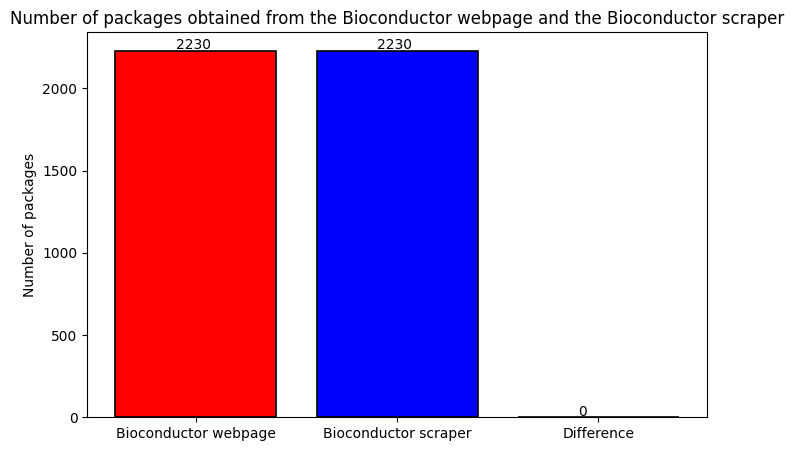

In [ ]:
bioconductor_package_list_expected = []
with open('results/package_lists/bioconductor_webpage.txt', 'r') as file:
    bioconductor_package_list_expected = file.read().splitlines()

bioconductor_package_list_obtained = []
with open('results/package_lists/bioconductor_scraped.txt', 'r') as file:
    bioconductor_package_list_obtained = file.read().splitlines()

compare_package_lists(
    bioconductor_package_list_expected,
    "Bioconductor webpage",
    bioconductor_package_list_obtained,
    "Bioconductor scraper"
)

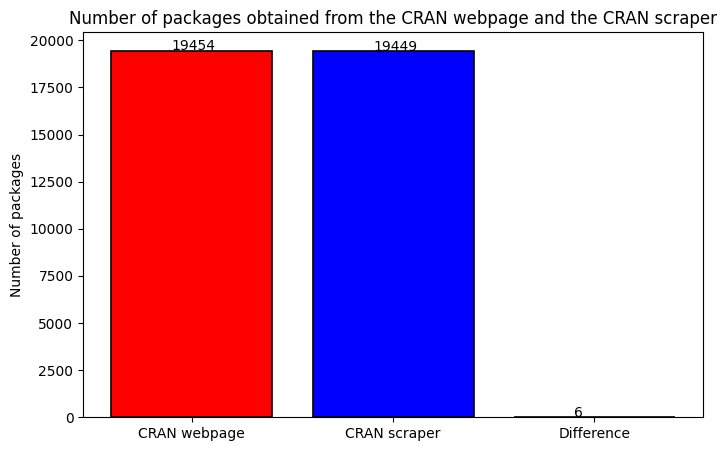

In [ ]:
cran_package_list_expected = []
with open('results/package_lists/cran_webpage.txt', 'r') as file:
    cran_package_list_expected = file.read().splitlines()

cran_package_list_obtained = []
with open('results/package_lists/cran_scraped.txt', 'r') as file:
    cran_package_list_obtained = file.read().splitlines()

compare_package_lists(
    cran_package_list_expected,
    "CRAN webpage",
    cran_package_list_obtained,
    "CRAN scraper"
)

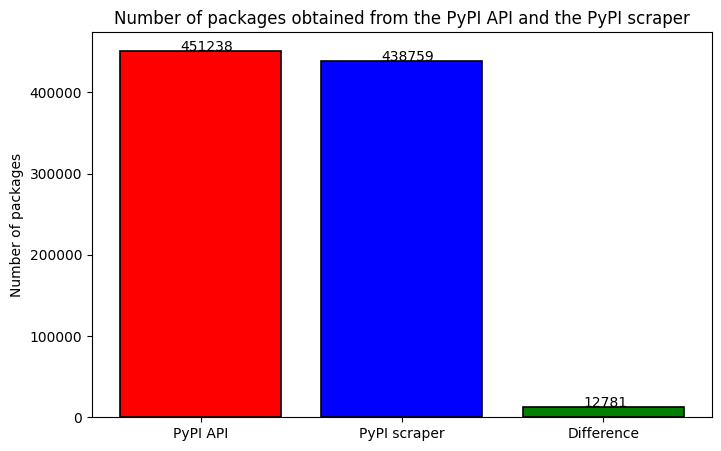

In [ ]:
pypi_package_list_expected = []
with open('results/package_lists/pypi_api_simple.txt', 'r') as file:
    pypi_package_list_expected = file.read().splitlines()

pypi_package_list_obtained = []
with open('results/package_lists/pypi_scraped.txt', 'r') as file:
    pypi_package_list_obtained = file.read().splitlines()

compare_package_lists(
    pypi_package_list_expected,
    "PyPI API",
    pypi_package_list_obtained,
    "PyPI scraper"
)

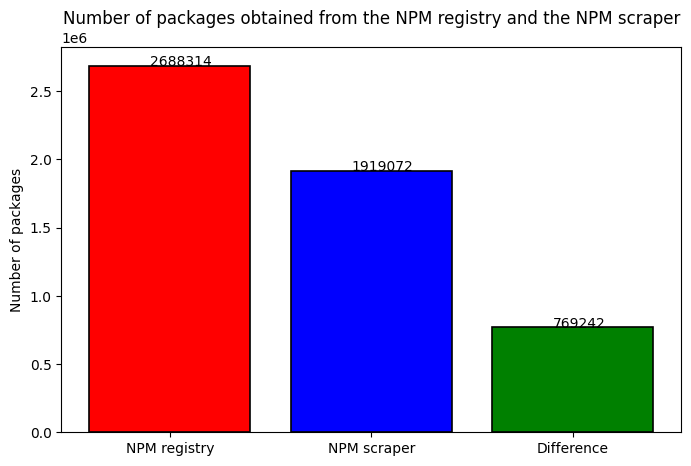

In [ ]:
npm_package_list_expected = []
with open('results/package_lists/npm_registry.txt', 'r') as file:
    npm_package_list_expected = file.read().splitlines()

npm_package_list_obtained = []
with open('results/package_lists/npm_scraped.txt', 'r') as file:
    npm_package_list_obtained = file.read().splitlines()

compare_package_lists(
    npm_package_list_expected,
    "NPM registry",
    npm_package_list_obtained,
    "NPM scraper"
)

### Draw network


If we wanted to visualize the network we could draw it

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_network(network, layout=nx.random_layout):
    '''
    Draw a network with networkx

    Parameters
    ----------
    network : dict
        Dictionary with the network
    layout : function
        Function to set the layout of the network
    '''

    G = nx.DiGraph()

    for package in network.keys():
        for dependency in network[package]:
            G.add_edge(package, dependency)

    # Set layout without superimposing nodes
    pos = layout(G)

    # Set size of nodes according to their degree
    node_size = [G.degree(node) * 100 for node in G]

    # Set size of figure
    plt.figure(figsize=(15, 15))
    nx.draw_networkx_nodes(G, pos, node_size=node_size,
                           node_color="blue", alpha=0.3)
    nx.draw_networkx_edges(G, pos, edge_color="grey", alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

    # Show plot
    plt.axis("off")
    plt.show()

Using the Bioconductor A4 Package dependency network that we are using as an example

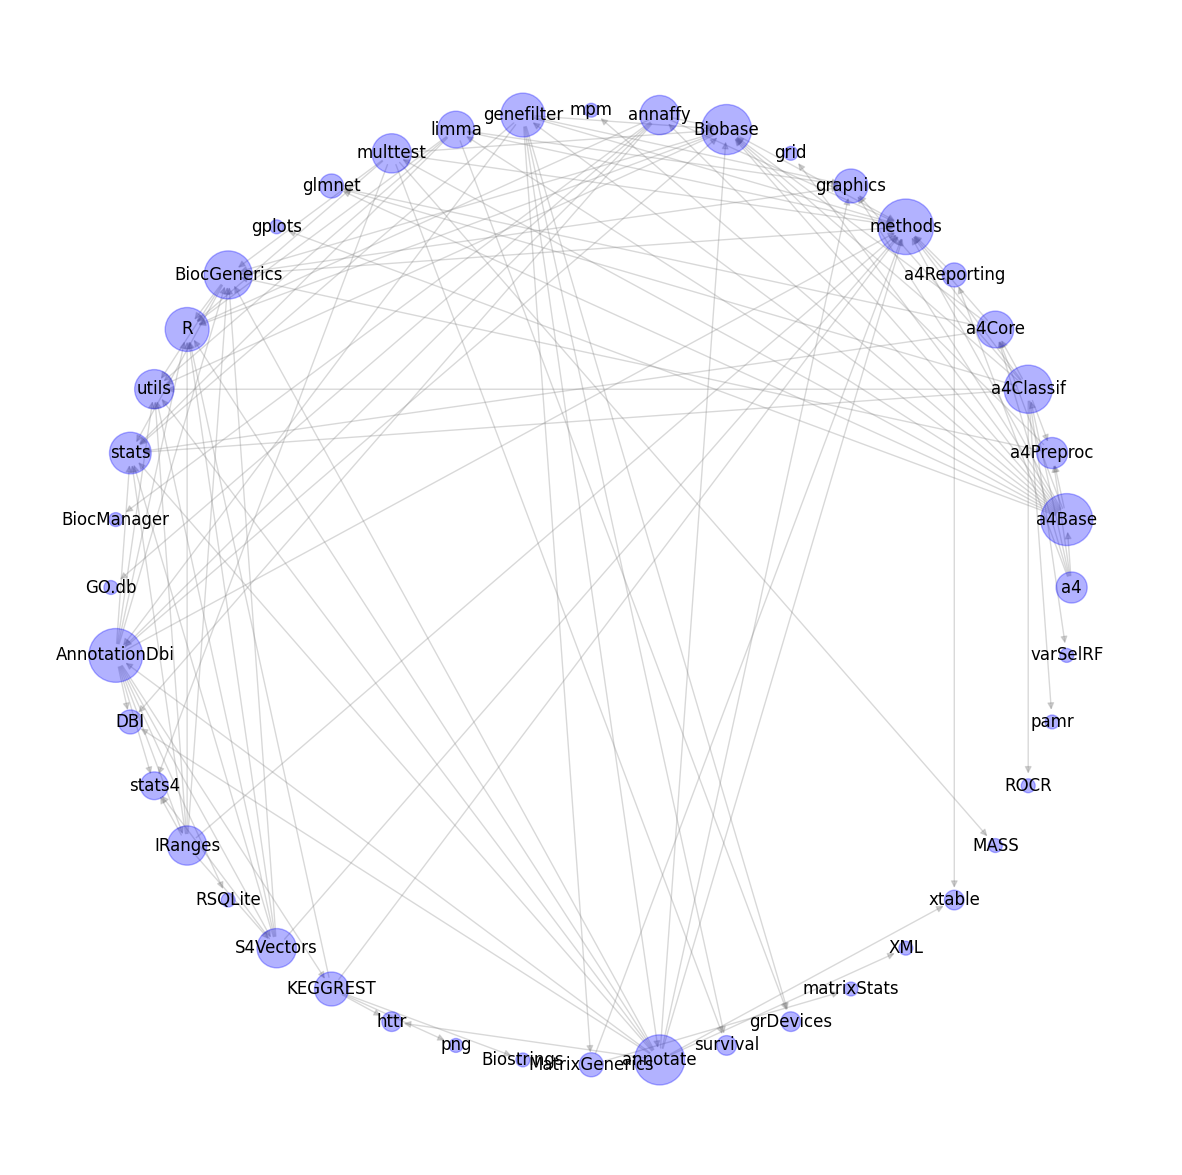

In [ ]:
draw_network(a4_network, nx.circular_layout)

We can appreciate the difference, as we explained before if we use a combined datasource

In [ ]:
bioconductor_cran_pm = PackageManager(
    "Bioconductor scraper with cran scraper as auxyliary",
    data_sources=[BioconductorScraper(), CranScraper()]
)

a4_network_2 = bioconductor_cran_pm.dependency_network("a4", generate=True)

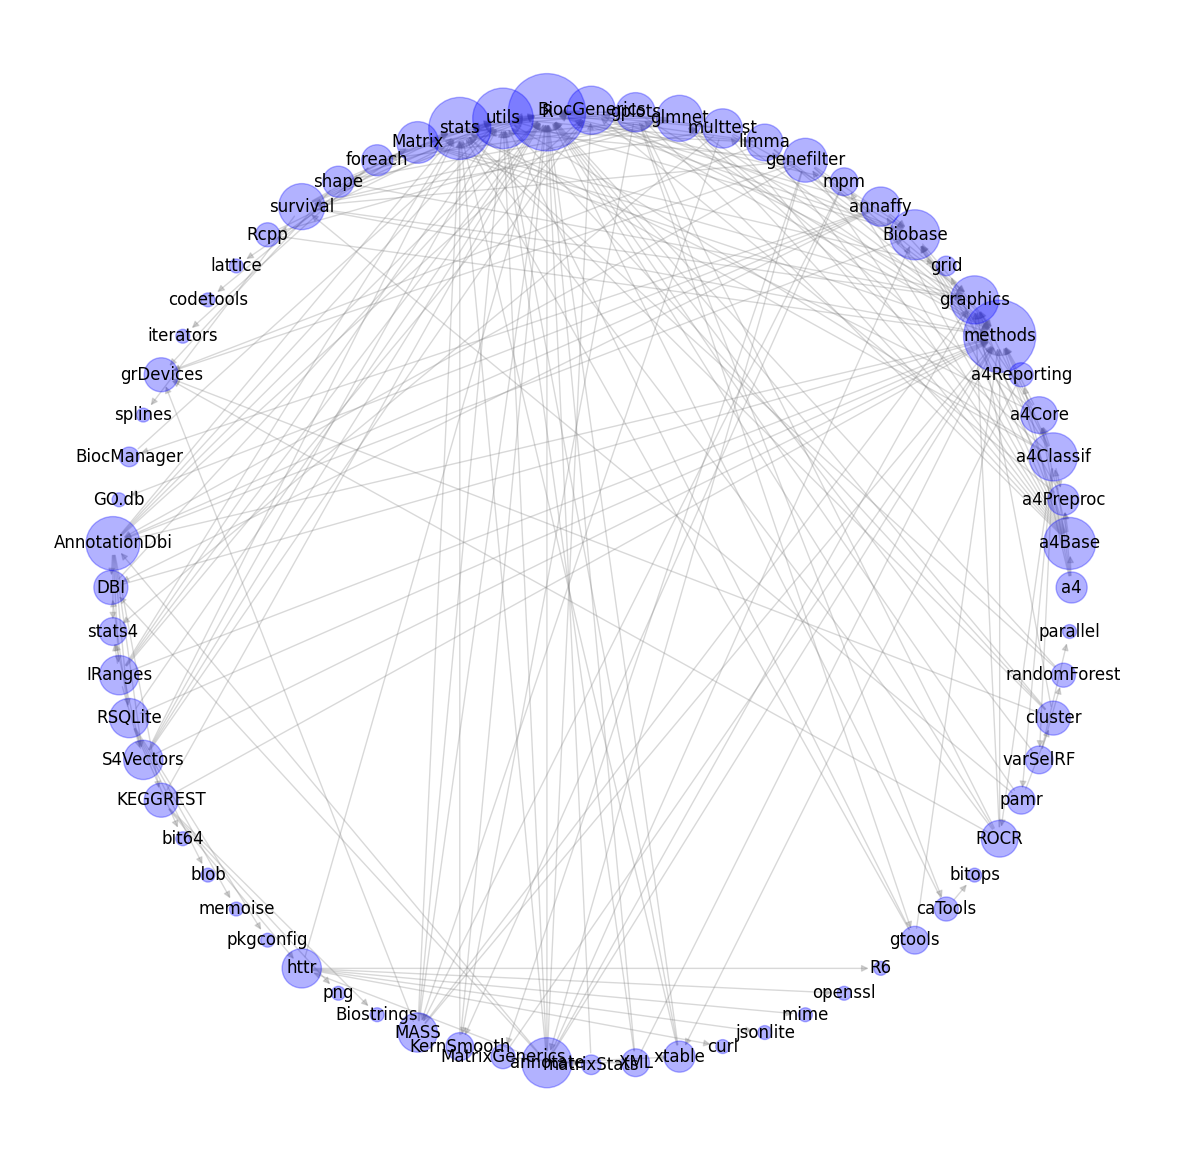

In [ ]:
draw_network(a4_network_2, nx.circular_layout)